<a href="https://colab.research.google.com/github/sarikaksstrcs/Advanced-Data-structures/blob/main/Review_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
data=pd.read_csv('preprocessed_kindle_review .csv',encoding='utf-8')

In [ ]:
data.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [ ]:
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
data.tail()

,Unnamed: 0,rating,reviewText,summary
11995,11995,2,Had to read certain passages twice--typos. Wi...,Where's the meat?
11996,11996,3,Not what i expected. yet a very interesting bo...,Interesting
11997,11997,5,Dragon Knights is a world where Knights ride d...,"Dragon Knights, Wings of Change (I Dream of Dr..."
11998,11998,4,"Since this story is very short, it's hard to s...","Good writing, short story"
11999,11999,4,from 1922 an amazing collection of info on sym...,interesting public domain book


In [ ]:
data.rating.value_counts()

5    3000
4    3000
1    2000
3    2000
2    2000
Name: rating, dtype: int64

In [ ]:
data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)
# data.rating=data.rating.replace([3],2)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
rating        0
reviewText    0
summary       0
dtype: int64

In [ ]:
data

,Unnamed: 0,rating,reviewText,summary
0,0,1,This book was the very first bookmobile book I...,50 + years ago...
1,1,0,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,1,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,1,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,1,"This isn't the kind of book I normally read, a...",Great Story!
...,...,...,...,...
11995,11995,0,Had to read certain passages twice--typos. Wi...,Where's the meat?
11996,11996,0,Not what i expected. yet a very interesting bo...,Interesting
11997,11997,1,Dragon Knights is a world where Knights ride d...,"Dragon Knights, Wings of Change (I Dream of Dr..."
11998,11998,1,"Since this story is very short, it's hard to s...","Good writing, short story"


In [ ]:
data.rating.value_counts()

1    6000
0    6000
Name: rating, dtype: int64

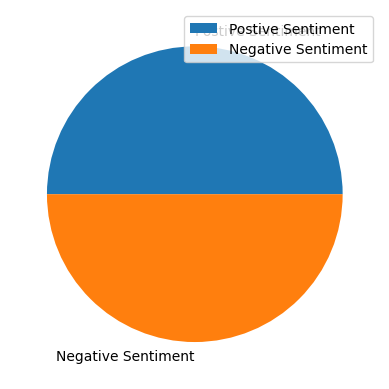

In [ ]:
y = np.array([6000,6000])
mylabels = ["Postive Sentiment", "Negative Sentiment"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

In [ ]:
sentiment_label = data.rating.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 0, 0]), Int64Index([1, 0], dtype='int64'))

In [ ]:
stopwords_to_exclude = [
    'cannot', 'cant', 'wont', 'dont', 'doesnt', 'didnt', 'isnt', 'arent', 'wasnt', 'werent',
    'havent', 'hasnt', 'hadnt', 'shouldnt', 'wouldnt', 'couldnt', 'mustnt', 'neednt',
    'isnt', 'aint', 'mightnt', 'shallnt', 'ought not','never'
]

tweet = data.reviewText

# Tokenize the text while excluding stopwords
tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`\'{|}~\t\n', lower=True, oov_token='<OOV>', split=' ')
tokenizer.fit_on_texts([text for text in tweet if text not in stopwords_to_exclude])
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences([text for text in tweet if text not in stopwords_to_exclude])
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           975872    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 992,523
Trainable params: 992,523
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
141/141 [==============================] - 71s 482ms/step - loss: 0.5991 - accuracy: 0.6756 - val_loss: 0.4482 - val_accuracy: 0.7980
Epoch 2/10
141/141 [==============================] - 66s 465ms/step - loss: 0.4012 - accuracy: 0.8328 - val_loss: 0.3961 - val_accuracy: 0.8287
Epoch 3/10
141/141 [==============================] - 63s 447ms/step - loss: 0.3384 - accuracy: 0.8636 - val_loss: 0.3852 - val_accuracy: 0.8390
Epoch 4/10
141/141 [==============================] - 65s 464ms/step - loss: 0.2922 - accuracy: 0.8831 - val_loss: 0.3887 - val_accuracy: 0.8380
Epoch 5/10
141/141 [==============================] - 66s 471ms/step - loss: 0.2449 - accuracy: 0.9059 - val_loss: 0.4236 - val_accuracy: 0.8347
Epoch 6/10
141/141 [==============================] - 64s 455ms/step - loss: 0.2269 - accuracy: 0.9134 - val_loss: 0.4519 - val_accuracy: 0.8363
Epoch 7/10
141/141 [==============================] - 64s 452ms/step - loss: 0.2082 - accuracy: 0.9229 - val_loss: 0.4469 - val_ac

In [ ]:
import pickle
pickle.dump(model,open('review_sentiment_with_neg_words.pkl','wb'))

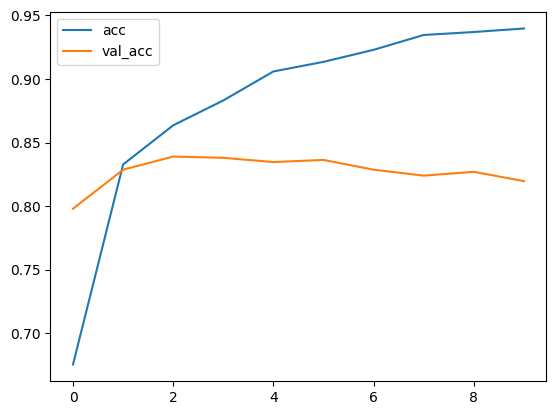

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

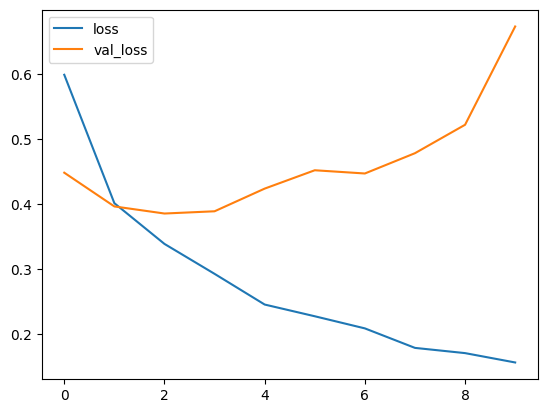

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]


In [ ]:
while True:
  test_sentence1 = input("Enter Text: ")
  prediction = predict_sentiment(test_sentence1)

  if prediction == 1:
      print("Postive Statement")
  else:
      print("Negative Statement")

Enter Text: I didn't like the book
1/1 [==============================] - 0s 322ms/step
Negative Statement
Enter Text: this isn't a good book
1/1 [==============================] - 0s 59ms/step
Negative Statement
Enter Text: this is good
1/1 [==============================] - 0s 43ms/step
Postive Statement


KeyboardInterrupt: ignored

In [ ]:
with open('/content/review_sentiment.pkl', 'rb') as file:
    review = pickle.load(file)


In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(review.predict(tw).round().item())
    return sentiment_label[1][prediction]

In [ ]:
while True:
  test_sentence1 = input("Enter Text: ")
  prediction = predict_sentiment(test_sentence1)

  if prediction == 1:
      print("Postive Statement")
  else:
      print("Negative Statement")

Enter Text: the book isn't good
1/1 [==============================] - 0s 332ms/step
Postive Statement


KeyboardInterrupt: ignored

In [ ]:
with open('/content/review_sentiment_with_neg_words.pkl', 'rb') as file:
    review2 = pickle.load(file)

In [ ]:
def predict_sentiment2(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(review2.predict(tw).round().item())
    return sentiment_label[1][prediction]

In [72]:
while True:
  test_sentence1 = input("Enter Text: ")
  prediction = predict_sentiment2(test_sentence1)

  if prediction == 1:
      print("Postive Statement")
  else:
      print("Negative Statement")

KeyboardInterrupt: ignored